<a href="https://colab.research.google.com/github/Punitpawar5/linear-regression-project/blob/main/california_housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


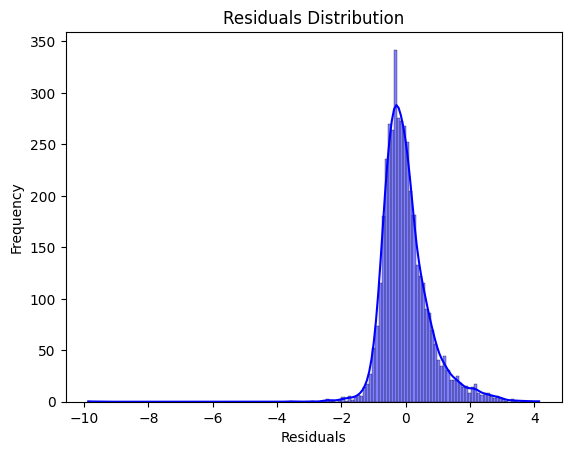

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_data():
    housing = fetch_california_housing(as_frame=True)
    data = pd.DataFrame(housing.data, columns=housing.feature_names)
    data['MedHouseVal'] = housing.target
    return data

def preprocess_data(data):
    X = data.drop('MedHouseVal', axis=1)
    y = data['MedHouseVal']
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2, predictions

def plot_residuals(y_test, predictions):
    residuals = y_test - predictions
    sns.histplot(residuals, kde=True, color='blue')
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

def main():
    # Load and preprocess data
    data = load_data()
    X_train, X_test, y_train, y_test = preprocess_data(data)

    # Train model
    model = train_model(X_train, y_train)

    # Evaluate model
    mse, r2, predictions = evaluate_model(model, X_test, y_test)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Plot residuals
    plot_residuals(y_test, predictions)

if __name__ == "__main__":
    main()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


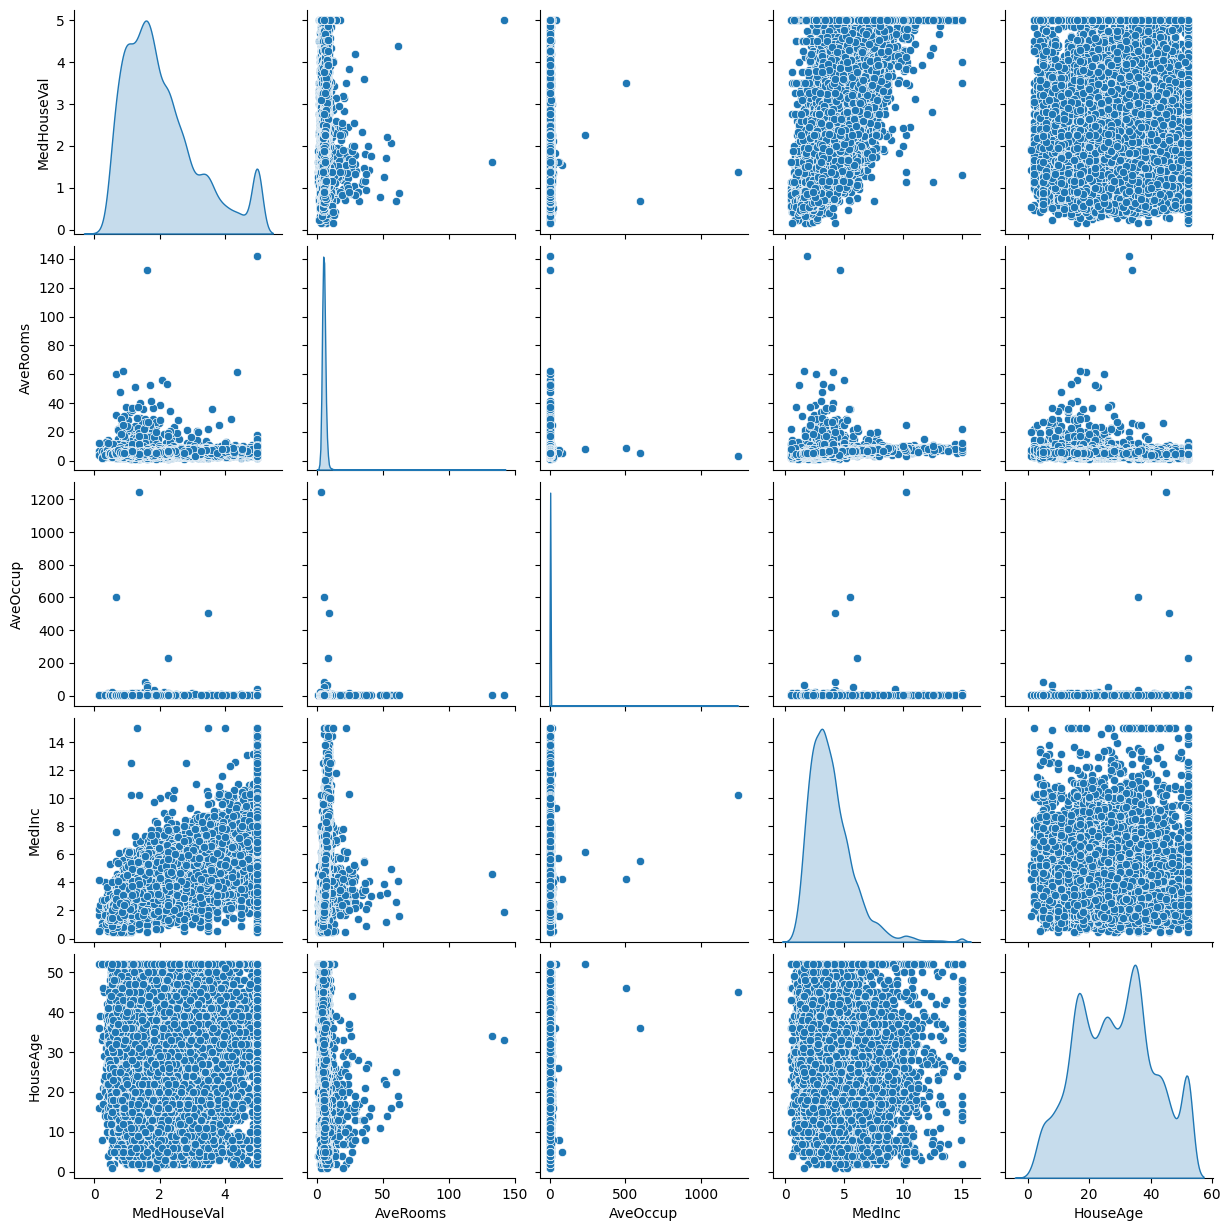

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


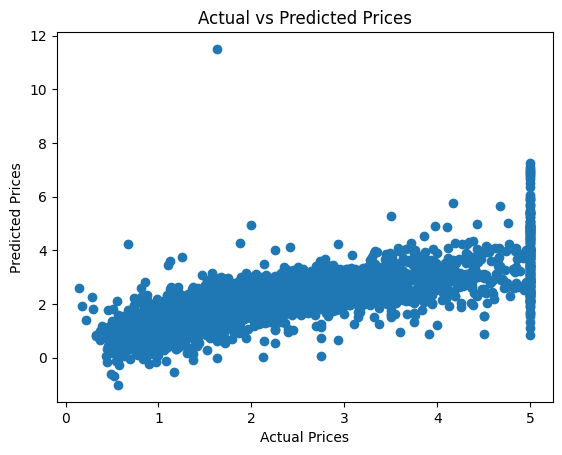

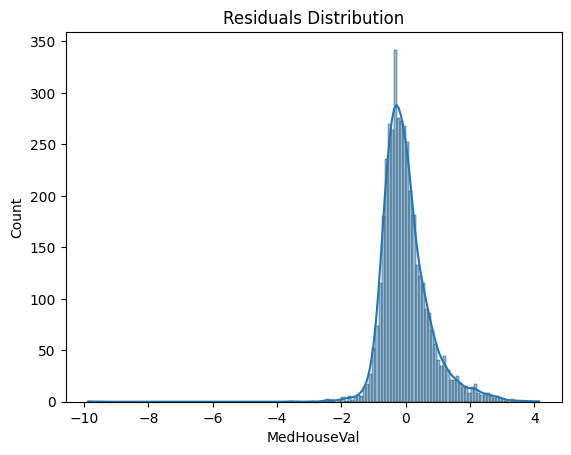

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
housing = fetch_california_housing(as_frame=True)
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

# Data exploration
print(data.head())
sns.pairplot(data[['MedHouseVal', 'AveRooms', 'AveOccup', 'MedInc', 'HouseAge']], diag_kind='kde')
plt.show()

# Preprocessing
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting results
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residuals
residuals = y_test - predictions
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()
